#### 모든 단어 묶음에 대한 워드클라우드

In [ ]:
# 2글자 이상인 경우 + '롱', '숏'만 추출하여 리스트 형식으로 저장
import ast

def over_two_letters(onedata):
    over_two_letters = []
    for v in ast.literal_eval(onedata):
        if len(v) >= 2 or ((v == '롱') | (v == '숏')):
            over_two_letters.append(v)
    return over_two_letters

In [ ]:
# 모든 단어에 대한 워드클라우드
all_words = np.array([])
for idx in tqdm(time_index):
    temp = np.array(over_two_letters(grouped_keywords_komoran.at[idx,"nouns"]))
    all_words = np.append(all_words, temp, axis=0)

all_words = all_words.flatten()
all_words = pd.DataFrame(data=all_words)
all_words.to_csv("./dataset_only_dc/all_words.csv", encoding="utf-8", index=False)
len(all_words)

100%|██████████| 669/669 [14:40<00:00,  1.32s/it]


8193938

In [ ]:
# all words read
all_words = pd.read_csv("./dataset_only_dc/all_words.csv", encoding="utf-8")
all_words

,0
0,메타
1,한국
2,세율
3,콜드
4,안산
...,...
8193933,분기
8193934,추천
8193935,해피
8193936,애플


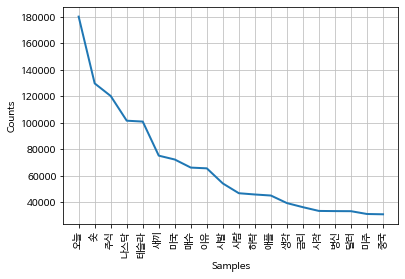

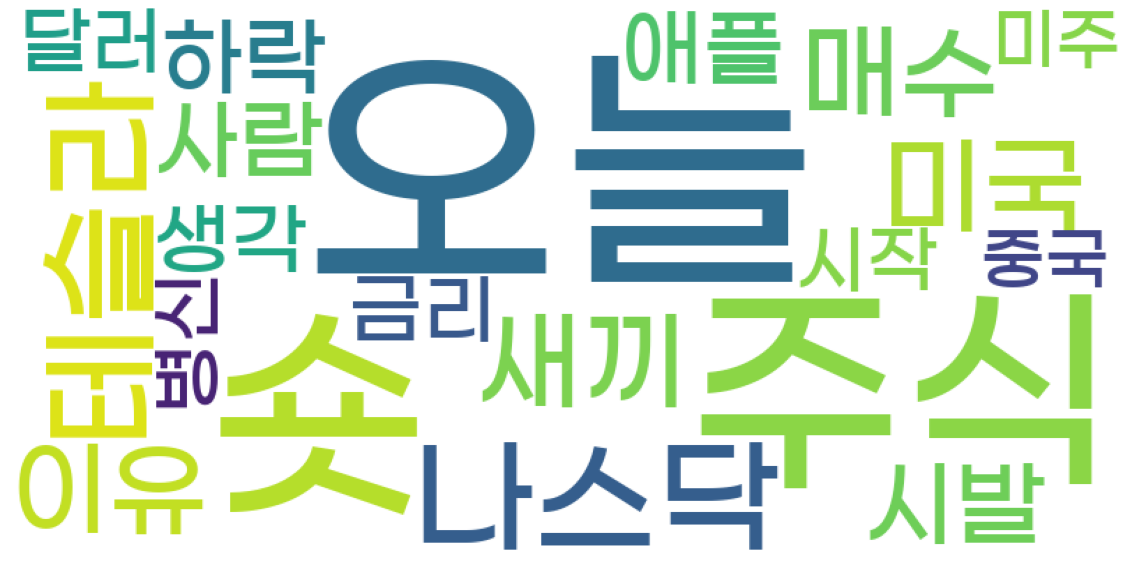

In [ ]:
# 모든 단어에 대한 빈도수 확인 및 워드클라우드 생성
from nltk import Text
from wordcloud import WordCloud

all_words = all_words.values.reshape(1,-1).flatten().tolist()
words_cnt = Text(all_words)
words_cnt.plot(20)
plt.show()

font_path = '/content/drive/MyDrive/workspace/font/GmarketSansTTFMedium.ttf'
wc = WordCloud(font_path=font_path, width=800, height=400, background_color='white', max_words=20)
gen = wc.generate_from_frequencies(words_cnt.vocab())
plt.figure(figsize=(20,16))
plt.imshow(gen)
plt.axis('off')
plt.show()

#### 특정 날짜에 대한 명사 출현 빈도 시각화

In [ ]:
# 명사 출현 빈도 카운트 함수
from collections import Counter


def count_nouns(n, nouns_list):
    count = Counter(nouns_list)
    top_list = count.most_common(n)
    return top_list

time_index = pd.date_range("2022-10-31", "2021-01-01", freq='-1D')
top100 = []
for idx in tqdm(time_index):
    temp = over_two_letters(grouped_keywords_komoran.at[idx,"nouns"])
    top100.append(count_nouns(100, temp))
df_top100 = pd.DataFrame(data=top100, columns=np.arange(0,100), index=time_index)
df_top100.to_csv("./dataset_only_dc/top100.csv", encoding="utf-8")

df_top100

100%|██████████| 669/669 [00:56<00:00, 11.75it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2022-10-31,"(숏, 273)","(오늘, 266)","(밀어, 139)","(이태원, 138)","(나스닥, 105)","(사람, 94)","(주식, 86)","(이유, 78)","(애플, 68)","(충이, 66)",...,"(제일, 15)","(영상, 15)","(사건, 15)","(본장, 15)","(올해, 15)","(사면, 14)","(인도, 14)","(만원, 14)","(지랄, 14)","(지표, 14)"
2022-10-30,"(이태원, 758)","(사람, 262)","(할로윈, 201)","(사고, 165)","(새끼, 143)","(사건, 129)","(주식, 113)","(애도, 98)","(한국, 97)","(이번, 93)",...,"(거지, 20)","(회사, 20)","(강요, 20)","(귀신, 20)","(애초, 19)","(하루, 19)","(찐따, 19)","(세계, 19)","(진짜, 18)","(지하철, 18)"
2022-10-29,"(숏, 518)","(애플, 255)","(주식, 183)","(미국, 147)","(오늘, 132)","(충이, 125)","(나스닥, 122)","(이유, 108)","(여자, 93)","(새끼, 82)",...,"(반등, 18)","(악재, 18)","(양전, 17)","(얘기, 17)","(수저, 17)","(매매, 17)","(환율, 17)","(탐욕, 17)","(가격, 16)","(이다, 16)"
2022-10-28,"(애플, 951)","(숏, 574)","(오늘, 466)","(아마존, 415)","(인텔, 296)","(메타, 290)","(나스닥, 213)","(실적, 193)","(주식, 186)","(미국, 182)",...,"(잡주, 28)","(내일, 28)","(기술, 27)","(20, 27)","(인상, 27)","(국장, 27)","(독일, 27)","(반영, 27)","(메타버스, 27)","(가자, 26)"
2022-10-27,"(메타, 1384)","(숏, 503)","(오늘, 440)","(애플, 317)","(주식, 215)","(나스닥, 213)","(새끼, 178)","(미국, 166)","(인텔, 164)","(달러, 151)",...,"(국장, 31)","(중간, 29)","(게임, 28)","(인간, 28)","(확정, 28)","(승리, 28)","(스위칭, 28)","(바닥, 28)","(시간, 28)","(호재, 28)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,"(오늘, 134)","(주식, 97)","(테슬라, 58)","(미국, 47)","(매수, 42)","(코스, 39)","(시발, 37)","(새끼, 32)","(조지아, 31)","(잡주, 29)",...,"(폭락, 8)","(변동, 8)","(대통령, 8)","(평가, 7)","(뉴스, 7)","(이란, 7)","(매도, 7)","(질문, 7)","(종가, 7)","(도박장, 7)"
2021-01-04,"(오늘, 113)","(비트코인, 90)","(주식, 78)","(테슬라, 75)","(매수, 61)","(프리, 33)","(마윈, 33)","(코스, 30)","(이유, 29)","(시발, 25)",...,"(바바, 7)","(돼지, 7)","(세레나데, 7)","(짱깨, 7)","(배당, 7)","(게이, 7)","(너구리, 7)","(계좌, 7)","(자산, 7)","(인증, 7)"
2021-01-03,"(비트코인, 124)","(주식, 58)","(이유, 38)","(테슬라, 36)","(사람, 33)","(비트, 28)","(미국, 26)","(미주, 24)","(관련, 23)","(내일, 21)",...,"(처음, 6)","(가자, 5)","(케이, 5)","(뱅크, 5)","(하락, 5)","(새해, 5)","(민주당, 5)","(가치, 5)","(주주, 5)","(주가, 5)"
2021-01-02,"(주식, 71)","(비트코인, 44)","(테슬라, 32)","(마소, 30)","(애플, 27)","(이유, 26)","(미주, 25)","(미국, 24)","(사람, 24)","(해주, 23)",...,"(예상, 5)","(로저스, 5)","(수익률, 5)","(근황, 5)","(헷지, 5)","(비번, 5)","(코로나, 5)","(이야기, 5)","(친구, 5)","(백신, 5)"


In [ ]:
# read_top100
df_top100 = pd.read_csv("./dataset_only_dc/top100.csv", encoding="utf-8", index_col=0, parse_dates=True)
df_top100.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2022-10-31,"('숏', 273)","('오늘', 266)","('밀어', 139)","('이태원', 138)","('나스닥', 105)","('사람', 94)","('주식', 86)","('이유', 78)","('애플', 68)","('충이', 66)",...,"('제일', 15)","('영상', 15)","('사건', 15)","('본장', 15)","('올해', 15)","('사면', 14)","('인도', 14)","('만원', 14)","('지랄', 14)","('지표', 14)"
2022-10-30,"('이태원', 758)","('사람', 262)","('할로윈', 201)","('사고', 165)","('새끼', 143)","('사건', 129)","('주식', 113)","('애도', 98)","('한국', 97)","('이번', 93)",...,"('거지', 20)","('회사', 20)","('강요', 20)","('귀신', 20)","('애초', 19)","('하루', 19)","('찐따', 19)","('세계', 19)","('진짜', 18)","('지하철', 18)"
2022-10-29,"('숏', 518)","('애플', 255)","('주식', 183)","('미국', 147)","('오늘', 132)","('충이', 125)","('나스닥', 122)","('이유', 108)","('여자', 93)","('새끼', 82)",...,"('반등', 18)","('악재', 18)","('양전', 17)","('얘기', 17)","('수저', 17)","('매매', 17)","('환율', 17)","('탐욕', 17)","('가격', 16)","('이다', 16)"
2022-10-28,"('애플', 951)","('숏', 574)","('오늘', 466)","('아마존', 415)","('인텔', 296)","('메타', 290)","('나스닥', 213)","('실적', 193)","('주식', 186)","('미국', 182)",...,"('잡주', 28)","('내일', 28)","('기술', 27)","('20', 27)","('인상', 27)","('국장', 27)","('독일', 27)","('반영', 27)","('메타버스', 27)","('가자', 26)"
2022-10-27,"('메타', 1384)","('숏', 503)","('오늘', 440)","('애플', 317)","('주식', 215)","('나스닥', 213)","('새끼', 178)","('미국', 166)","('인텔', 164)","('달러', 151)",...,"('국장', 31)","('중간', 29)","('게임', 28)","('인간', 28)","('확정', 28)","('승리', 28)","('스위칭', 28)","('바닥', 28)","('시간', 28)","('호재', 28)"


In [ ]:
# 특정 날짜의 단어 빈도수 그래프 및 워드 클라우드 생성 함수
def plot_cnt(df, date, max_words=20):
    '''
    데이터프레임 임력
    '''
    dic = dict(df.loc[date,:].squeeze().apply(lambda x: ast.literal_eval(x)).values)
    x, y = zip(*dic.items())
    
    from wordcloud import WordCloud
    plt.figure(figsize=(8, 6))
    plt.plot(x[:max_words], y[:max_words])
    plt.xticks(rotation=45)
    plt.title(f"{date} / 빈도수 그래프")
    plt.show()

    font_path = '/content/drive/MyDrive/workspace/font/GmarketSansTTFMedium.ttf'
    wc = WordCloud(font_path=font_path, width=800, height=400, background_color='white', max_words=50)
    gen = wc.generate_from_frequencies(dic)
    plt.figure(figsize=(10,8))
    plt.imshow(gen)
    plt.axis('off')
    plt.show()

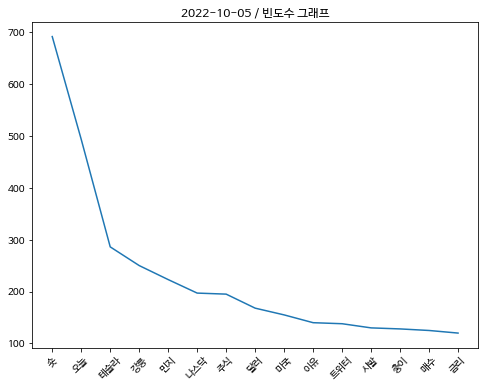

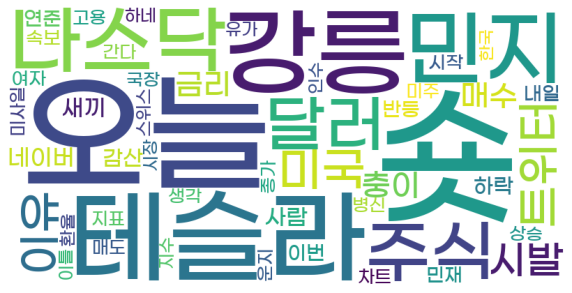

In [ ]:
plot_cnt(df_top100, '2022-10-05', 15)

#### 특정 날짜에 대한 명사 출현 빈도 시각화

In [ ]:
# 명사 출현 빈도 카운트 함수
from collections import Counter


def count_nouns(n, nouns_list):
    count = Counter(nouns_list)
    top_list = count.most_common(n)
    return top_list

time_index = pd.date_range("2022-10-31", "2021-01-01", freq='-1D')
top100 = []
for idx in tqdm(time_index):
    temp = over_two_letters(grouped_keywords_komoran.at[idx,"nouns"])
    top100.append(count_nouns(100, temp))
df_top100 = pd.DataFrame(data=top100, columns=np.arange(0,100), index=time_index)
df_top100.to_csv("./dataset_only_dc/top100.csv", encoding="utf-8")

df_top100

100%|██████████| 669/669 [00:56<00:00, 11.75it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2022-10-31,"(숏, 273)","(오늘, 266)","(밀어, 139)","(이태원, 138)","(나스닥, 105)","(사람, 94)","(주식, 86)","(이유, 78)","(애플, 68)","(충이, 66)",...,"(제일, 15)","(영상, 15)","(사건, 15)","(본장, 15)","(올해, 15)","(사면, 14)","(인도, 14)","(만원, 14)","(지랄, 14)","(지표, 14)"
2022-10-30,"(이태원, 758)","(사람, 262)","(할로윈, 201)","(사고, 165)","(새끼, 143)","(사건, 129)","(주식, 113)","(애도, 98)","(한국, 97)","(이번, 93)",...,"(거지, 20)","(회사, 20)","(강요, 20)","(귀신, 20)","(애초, 19)","(하루, 19)","(찐따, 19)","(세계, 19)","(진짜, 18)","(지하철, 18)"
2022-10-29,"(숏, 518)","(애플, 255)","(주식, 183)","(미국, 147)","(오늘, 132)","(충이, 125)","(나스닥, 122)","(이유, 108)","(여자, 93)","(새끼, 82)",...,"(반등, 18)","(악재, 18)","(양전, 17)","(얘기, 17)","(수저, 17)","(매매, 17)","(환율, 17)","(탐욕, 17)","(가격, 16)","(이다, 16)"
2022-10-28,"(애플, 951)","(숏, 574)","(오늘, 466)","(아마존, 415)","(인텔, 296)","(메타, 290)","(나스닥, 213)","(실적, 193)","(주식, 186)","(미국, 182)",...,"(잡주, 28)","(내일, 28)","(기술, 27)","(20, 27)","(인상, 27)","(국장, 27)","(독일, 27)","(반영, 27)","(메타버스, 27)","(가자, 26)"
2022-10-27,"(메타, 1384)","(숏, 503)","(오늘, 440)","(애플, 317)","(주식, 215)","(나스닥, 213)","(새끼, 178)","(미국, 166)","(인텔, 164)","(달러, 151)",...,"(국장, 31)","(중간, 29)","(게임, 28)","(인간, 28)","(확정, 28)","(승리, 28)","(스위칭, 28)","(바닥, 28)","(시간, 28)","(호재, 28)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,"(오늘, 134)","(주식, 97)","(테슬라, 58)","(미국, 47)","(매수, 42)","(코스, 39)","(시발, 37)","(새끼, 32)","(조지아, 31)","(잡주, 29)",...,"(폭락, 8)","(변동, 8)","(대통령, 8)","(평가, 7)","(뉴스, 7)","(이란, 7)","(매도, 7)","(질문, 7)","(종가, 7)","(도박장, 7)"
2021-01-04,"(오늘, 113)","(비트코인, 90)","(주식, 78)","(테슬라, 75)","(매수, 61)","(프리, 33)","(마윈, 33)","(코스, 30)","(이유, 29)","(시발, 25)",...,"(바바, 7)","(돼지, 7)","(세레나데, 7)","(짱깨, 7)","(배당, 7)","(게이, 7)","(너구리, 7)","(계좌, 7)","(자산, 7)","(인증, 7)"
2021-01-03,"(비트코인, 124)","(주식, 58)","(이유, 38)","(테슬라, 36)","(사람, 33)","(비트, 28)","(미국, 26)","(미주, 24)","(관련, 23)","(내일, 21)",...,"(처음, 6)","(가자, 5)","(케이, 5)","(뱅크, 5)","(하락, 5)","(새해, 5)","(민주당, 5)","(가치, 5)","(주주, 5)","(주가, 5)"
2021-01-02,"(주식, 71)","(비트코인, 44)","(테슬라, 32)","(마소, 30)","(애플, 27)","(이유, 26)","(미주, 25)","(미국, 24)","(사람, 24)","(해주, 23)",...,"(예상, 5)","(로저스, 5)","(수익률, 5)","(근황, 5)","(헷지, 5)","(비번, 5)","(코로나, 5)","(이야기, 5)","(친구, 5)","(백신, 5)"


In [ ]:
# read_top100
df_top100 = pd.read_csv("./dataset_only_dc/top100.csv", encoding="utf-8", index_col=0, parse_dates=True)
df_top100.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2022-10-31,"('숏', 273)","('오늘', 266)","('밀어', 139)","('이태원', 138)","('나스닥', 105)","('사람', 94)","('주식', 86)","('이유', 78)","('애플', 68)","('충이', 66)",...,"('제일', 15)","('영상', 15)","('사건', 15)","('본장', 15)","('올해', 15)","('사면', 14)","('인도', 14)","('만원', 14)","('지랄', 14)","('지표', 14)"
2022-10-30,"('이태원', 758)","('사람', 262)","('할로윈', 201)","('사고', 165)","('새끼', 143)","('사건', 129)","('주식', 113)","('애도', 98)","('한국', 97)","('이번', 93)",...,"('거지', 20)","('회사', 20)","('강요', 20)","('귀신', 20)","('애초', 19)","('하루', 19)","('찐따', 19)","('세계', 19)","('진짜', 18)","('지하철', 18)"
2022-10-29,"('숏', 518)","('애플', 255)","('주식', 183)","('미국', 147)","('오늘', 132)","('충이', 125)","('나스닥', 122)","('이유', 108)","('여자', 93)","('새끼', 82)",...,"('반등', 18)","('악재', 18)","('양전', 17)","('얘기', 17)","('수저', 17)","('매매', 17)","('환율', 17)","('탐욕', 17)","('가격', 16)","('이다', 16)"
2022-10-28,"('애플', 951)","('숏', 574)","('오늘', 466)","('아마존', 415)","('인텔', 296)","('메타', 290)","('나스닥', 213)","('실적', 193)","('주식', 186)","('미국', 182)",...,"('잡주', 28)","('내일', 28)","('기술', 27)","('20', 27)","('인상', 27)","('국장', 27)","('독일', 27)","('반영', 27)","('메타버스', 27)","('가자', 26)"
2022-10-27,"('메타', 1384)","('숏', 503)","('오늘', 440)","('애플', 317)","('주식', 215)","('나스닥', 213)","('새끼', 178)","('미국', 166)","('인텔', 164)","('달러', 151)",...,"('국장', 31)","('중간', 29)","('게임', 28)","('인간', 28)","('확정', 28)","('승리', 28)","('스위칭', 28)","('바닥', 28)","('시간', 28)","('호재', 28)"


In [ ]:
# 특정 날짜의 단어 빈도수 그래프 및 워드 클라우드 생성 함수
def plot_cnt(df, date, max_words=20):
    '''
    데이터프레임 임력
    '''
    dic = dict(df.loc[date,:].squeeze().apply(lambda x: ast.literal_eval(x)).values)
    x, y = zip(*dic.items())
    
    from wordcloud import WordCloud
    plt.figure(figsize=(8, 6))
    plt.plot(x[:max_words], y[:max_words])
    plt.xticks(rotation=45)
    plt.title(f"{date} / 빈도수 그래프")
    plt.show()

    font_path = '/content/drive/MyDrive/workspace/font/GmarketSansTTFMedium.ttf'
    wc = WordCloud(font_path=font_path, width=800, height=400, background_color='white', max_words=50)
    gen = wc.generate_from_frequencies(dic)
    plt.figure(figsize=(10,8))
    plt.imshow(gen)
    plt.axis('off')
    plt.show()

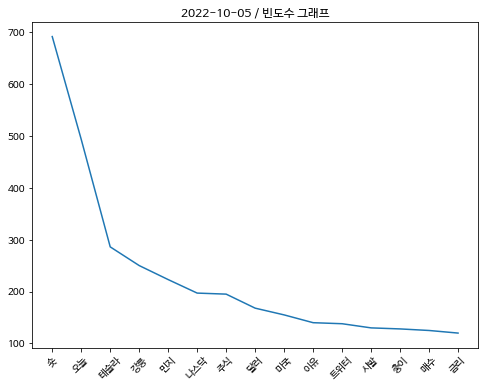

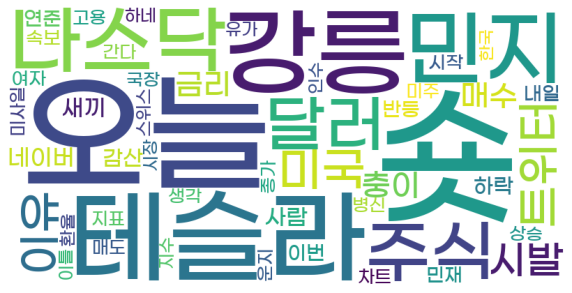

In [ ]:
plot_cnt(df_top100, '2022-10-05', 15)

#### 하루 단위의 게시글 묶음을 하나의 문서로 생각..

- 해당일의 의견 데이터프레임이 다음날의 나스닥 변동률 추가하여 파악



In [ ]:
# 2글자 이상인 경우 + '롱', '숏'만 추출하여 리스트 형식으로 저장
import ast

def over_two_letters(onedata):
    over_two_letters = []
    for v in ast.literal_eval(onedata):
        if len(v) >= 2 or ((v == '롱') | (v == '숏')):
            over_two_letters.append(v)
    return over_two_letters

time_index = pd.date_range("2022-10-31", "2021-01-01", freq='-1D')
twoletters = []
for idx in tqdm(time_index):
    temp = over_two_letters(grouped_keywords_komoran.at[idx,"nouns"])
    temp = np.array(temp).reshape(1,-1).tolist()
    twoletters.append(temp)

df_twoletters = pd.DataFrame(data=twoletters, index=time_index)
df_twoletters

100%|██████████| 669/669 [02:38<00:00,  4.22it/s]


,0
2022-10-31,"[메타, 한국, 세율, 콜드, 안산, 녀석, 시간, 오늘, 구라, 세기, 정유, 숏..."
2022-10-30,"[인간, 인식, 이건, 진짜, 이태원, 사태, 일침, 경찰관, 소방관, 의료진, 당..."
2022-10-29,"[이태원, 세상, 가치, 죽음, 사람, 이든, 한녀, 태원, 단체, 기사, 호흡곤란..."
2022-10-28,"[애플, 만큼, 이랑, 회사, 나스닥, 호재, 애플, 실적, 어거지, 생각, 인텔,..."
2022-10-27,"[잠깐, 만요, 애플, 수면, 매매, 가자, 쿠팡, 나스닥, 시발, 양전, 동안, ..."
...,...
2021-01-05,"[반반, 이야기, 블랙, 레모네이드, 티어, 양전, 지속, 새끼, 달러, 나락, 징..."
2021-01-04,"[모드, 잡주, 예상, 주식, 퀀텀, 스케이프, 캐시, 우드, 누나, 주거, 동남아..."
2021-01-03,"[여유, 있다, 년대, 인질, 프로, 주식, 비트, 자살자, 속출, 폭탄, 배당, ..."
2021-01-02,"[상당, 부분, 사토시, 관상, 정체, 영어, 까막눈, 원어, 칼럼, 논문, 방법,..."


In [ ]:
df_top100

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2022-10-31,"('숏', 273)","('오늘', 266)","('밀어', 139)","('이태원', 138)","('나스닥', 105)","('사람', 94)","('주식', 86)","('이유', 78)","('애플', 68)","('충이', 66)",...,"('제일', 15)","('영상', 15)","('사건', 15)","('본장', 15)","('올해', 15)","('사면', 14)","('인도', 14)","('만원', 14)","('지랄', 14)","('지표', 14)"
2022-10-30,"('이태원', 758)","('사람', 262)","('할로윈', 201)","('사고', 165)","('새끼', 143)","('사건', 129)","('주식', 113)","('애도', 98)","('한국', 97)","('이번', 93)",...,"('거지', 20)","('회사', 20)","('강요', 20)","('귀신', 20)","('애초', 19)","('하루', 19)","('찐따', 19)","('세계', 19)","('진짜', 18)","('지하철', 18)"
2022-10-29,"('숏', 518)","('애플', 255)","('주식', 183)","('미국', 147)","('오늘', 132)","('충이', 125)","('나스닥', 122)","('이유', 108)","('여자', 93)","('새끼', 82)",...,"('반등', 18)","('악재', 18)","('양전', 17)","('얘기', 17)","('수저', 17)","('매매', 17)","('환율', 17)","('탐욕', 17)","('가격', 16)","('이다', 16)"
2022-10-28,"('애플', 951)","('숏', 574)","('오늘', 466)","('아마존', 415)","('인텔', 296)","('메타', 290)","('나스닥', 213)","('실적', 193)","('주식', 186)","('미국', 182)",...,"('잡주', 28)","('내일', 28)","('기술', 27)","('20', 27)","('인상', 27)","('국장', 27)","('독일', 27)","('반영', 27)","('메타버스', 27)","('가자', 26)"
2022-10-27,"('메타', 1384)","('숏', 503)","('오늘', 440)","('애플', 317)","('주식', 215)","('나스닥', 213)","('새끼', 178)","('미국', 166)","('인텔', 164)","('달러', 151)",...,"('국장', 31)","('중간', 29)","('게임', 28)","('인간', 28)","('확정', 28)","('승리', 28)","('스위칭', 28)","('바닥', 28)","('시간', 28)","('호재', 28)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,"('오늘', 134)","('주식', 97)","('테슬라', 58)","('미국', 47)","('매수', 42)","('코스', 39)","('시발', 37)","('새끼', 32)","('조지아', 31)","('잡주', 29)",...,"('폭락', 8)","('변동', 8)","('대통령', 8)","('평가', 7)","('뉴스', 7)","('이란', 7)","('매도', 7)","('질문', 7)","('종가', 7)","('도박장', 7)"
2021-01-04,"('오늘', 113)","('비트코인', 90)","('주식', 78)","('테슬라', 75)","('매수', 61)","('프리', 33)","('마윈', 33)","('코스', 30)","('이유', 29)","('시발', 25)",...,"('바바', 7)","('돼지', 7)","('세레나데', 7)","('짱깨', 7)","('배당', 7)","('게이', 7)","('너구리', 7)","('계좌', 7)","('자산', 7)","('인증', 7)"
2021-01-03,"('비트코인', 124)","('주식', 58)","('이유', 38)","('테슬라', 36)","('사람', 33)","('비트', 28)","('미국', 26)","('미주', 24)","('관련', 23)","('내일', 21)",...,"('처음', 6)","('가자', 5)","('케이', 5)","('뱅크', 5)","('하락', 5)","('새해', 5)","('민주당', 5)","('가치', 5)","('주주', 5)","('주가', 5)"
2021-01-02,"('주식', 71)","('비트코인', 44)","('테슬라', 32)","('마소', 30)","('애플', 27)","('이유', 26)","('미주', 25)","('미국', 24)","('사람', 24)","('해주', 23)",...,"('예상', 5)","('로저스', 5)","('수익률', 5)","('근황', 5)","('헷지', 5)","('비번', 5)","('코로나', 5)","('이야기', 5)","('친구', 5)","('백신', 5)"


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

time_index = pd.date_range("2022-10-31", "2021-01-01", freq='-1D')
docs = [' '.join(df_top100.iloc[i,:].apply(lambda x: x.split("'")[1])) for i in range(len(time_index))]
docs[4]

'메타 숏 오늘 애플 주식 나스닥 새끼 미국 인텔 달러 이유 실적 시발 테슬라 금리 구글 사람 마소 반도체 생각 하락 매수 충이 발표 상승 시작 지표 양전 경제 내일 미주 병신 요즘 트위터 운지 주가 아마존 하네 지금 커버 환율 이번 테크 시장 중국 한국 민지 다우 채권 차트 지수 엔비디아 속보 만원 랠리 메타버스 기업 여자 예상 평단 실업 바이든 가격 인상 침체 보니 폭락 프로 이랑 스타 노스 거지 때문 개미 10년 간다 파월 정도 본장 보잉 인플레 매도 지랄 문과 경기 쿠팡 니들 미래 반등 선거 국장 중간 게임 인간 확정 승리 스위칭 바닥 시간 호재'

##### Bag of Words


In [ ]:
time_index = pd.date_range("2022-10-31", "2021-01-01", freq='-1D')

vec = CountVectorizer()
V = vec.fit_transform(docs)

df_docs = pd.DataFrame(V.toarray(), columns=vec.get_feature_names(), index=time_index)
kmeans = KMeans(n_clusters=3).fit(df_docs)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([148, 231, 290]))

In [ ]:
df_docs["cluster"] = kmeans.labels_

In [ ]:
# 1) PCA 기법을 통해 2차원으로 축소 후, 군집 결과를 시각화.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_docs)

df_docs["pca_x"] = pca_transformed[:,0]
df_docs["pca_y"] = pca_transformed[:,1]

df_docs

,10,100,10년,10억,10월,11월,129,12월,13,14,...,후지,훈련,훈련소,휴전,흑우,흑인,희망,cluster,pca_x,pca_y
2022-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2.100983,1.075474
2022-10-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.018186,2.816348
2022-10-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.790675,1.825283
2022-10-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.904283,0.565462
2022-10-27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2.445063,0.122329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,-1.578331,-1.111444
2021-01-04,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,-2.494390,-0.892325
2021-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.673491,1.007883
2021-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-3.527402,1.467132


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


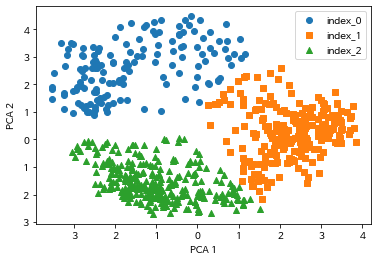

In [ ]:
marker0_ind = df_docs[df_docs['cluster'] == 0].index
marker1_ind = df_docs[df_docs['cluster'] == 1].index
marker2_ind = df_docs[df_docs['cluster'] == 2].index

plt.scatter(x=df_docs.loc[marker0_ind, 'pca_x'], y=df_docs.loc[marker0_ind, 'pca_y'], marker='o', label='index_0')
plt.scatter(x=df_docs.loc[marker1_ind, 'pca_x'], y=df_docs.loc[marker1_ind, 'pca_y'], marker='s', label='index_1')
plt.scatter(x=df_docs.loc[marker2_ind, 'pca_x'], y=df_docs.loc[marker2_ind, 'pca_y'], marker='^', label='index_2')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [ ]:
# 군집 평가 - silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(V.toarray(), df_docs['cluster'])
print('silhouette_sample( ) return 값의 shape', score_samples.shape)

df_docs['silhouette_coeff'] = score_samples

average_score = silhouette_score(V.toarray(), df_docs['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
df_docs.head()

silhouette_sample( ) return 값의 shape (669,)
Silhouette Analysis Score:0.055


,10,100,10년,10억,10월,11월,129,12월,13,14,...,훈련,훈련소,휴전,흑우,흑인,희망,cluster,pca_x,pca_y,silhouette_coeff
2022-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.100983,1.075474,0.094532
2022-10-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.018186,2.816348,0.018140
2022-10-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.790675,1.825283,0.065055
2022-10-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1.904283,0.565462,0.097403
2022-10-27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.445063,0.122329,0.103074


In [ ]:
df_docs.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.017802
1    0.101617
2    0.037354
Name: silhouette_coeff, dtype: float64

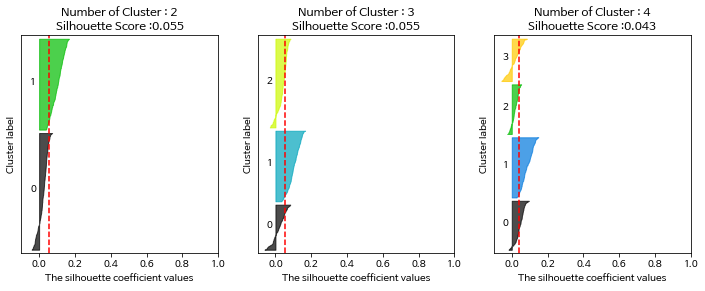

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
# https://github.com/wikibook/pymlrev2/blob/main/7%EC%9E%A5/7-2_Cluster%20evaluation.ipynb
#
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2,3,4], V.toarray())

#####  TF-IDF

In [ ]:
time_index = pd.date_range("2022-10-31", "2021-01-01", freq='-1D')

tfidf_vect = TfidfVectorizer(min_df=0.05, max_df=0.85)
tf_V = tfidf_vect.fit_transform(docs)

df_docs_tfidf = pd.DataFrame(tf_V.toarray(), columns=tfidf_vect.get_feature_names(), index=time_index)
kmeans = KMeans(n_clusters=3).fit(df_docs_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_docs_tfidf["cluster"] = kmeans.labels_

In [ ]:
# 1) PCA 기법을 통해 2차원으로 축소 후, 군집 결과를 시각화.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_docs_tfidf)

df_docs_tfidf["pca_x"] = pca_transformed[:,0]
df_docs_tfidf["pca_y"] = pca_transformed[:,1]

df_docs_tfidf

,10년,20대,3월,9월,가격,가자,간다,개미,거래,거래량,...,해주,현금,호로,호재,환율,환전,회사,cluster,pca_x,pca_y
2022-10-31,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.070505,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.106302,0.000000,0.000000,0,1.135346,-0.051279
2022-10-30,0.000000,0.228716,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.104082,1,0.100425,0.294473
2022-10-29,0.000000,0.000000,0.0,0.000000,0.115230,0.000000,0.072047,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.108627,0.000000,0.000000,0,1.113625,0.155091
2022-10-28,0.000000,0.000000,0.0,0.000000,0.106924,0.190626,0.066853,0.081273,0.000000,0.0,...,0.000000,0.000000,0.0,0.115982,0.000000,0.000000,0.085089,0,1.129059,-0.086004
2022-10-27,0.166664,0.000000,0.0,0.000000,0.114601,0.000000,0.071654,0.087109,0.000000,0.0,...,0.000000,0.000000,0.0,0.124309,0.108035,0.000000,0.000000,0,1.117038,-0.131095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05,0.000000,0.000000,0.0,0.181418,0.000000,0.000000,0.068410,0.000000,0.000000,0.0,...,0.157604,0.000000,0.0,0.000000,0.103145,0.000000,0.087071,2,-0.928470,0.004416
2021-01-04,0.000000,0.000000,0.0,0.000000,0.104650,0.000000,0.065432,0.000000,0.000000,0.0,...,0.150742,0.000000,0.0,0.000000,0.098654,0.000000,0.000000,2,-0.938033,0.107153
2021-01-03,0.000000,0.000000,0.0,0.000000,0.000000,0.218147,0.000000,0.000000,0.231271,0.0,...,0.176253,0.095466,0.0,0.000000,0.000000,0.000000,0.000000,1,0.050488,0.254509
2021-01-02,0.000000,0.000000,0.0,0.000000,0.103604,0.000000,0.064777,0.000000,0.000000,0.0,...,0.149234,0.000000,0.0,0.000000,0.000000,0.000000,0.082447,1,0.036869,0.339701


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


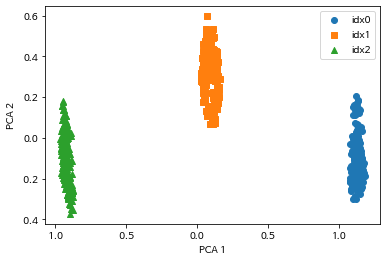

In [ ]:
marker0_ind = df_docs_tfidf[df_docs_tfidf['cluster'] == 0].index
marker1_ind = df_docs_tfidf[df_docs_tfidf['cluster'] == 1].index
marker2_ind = df_docs_tfidf[df_docs_tfidf['cluster'] == 2].index

plt.scatter(x=df_docs_tfidf.loc[marker0_ind, 'pca_x'], y=df_docs_tfidf.loc[marker0_ind, 'pca_y'], marker='o', label='idx0')
plt.scatter(x=df_docs_tfidf.loc[marker1_ind, 'pca_x'], y=df_docs_tfidf.loc[marker1_ind, 'pca_y'], marker='s', label='idx1')
plt.scatter(x=df_docs_tfidf.loc[marker2_ind, 'pca_x'], y=df_docs_tfidf.loc[marker2_ind, 'pca_y'], marker='^', label='idx2')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [ ]:
# 군집 평가 - silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(tf_V.toarray(), df_docs_tfidf['cluster'])
print('silhouette_sample( ) return 값의 shape', score_samples.shape)

df_docs_tfidf['silhouette_coeff'] = score_samples

average_score = silhouette_score(tf_V.toarray(), df_docs_tfidf['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
df_docs_tfidf.head()

silhouette_sample( ) return 값의 shape (669,)
Silhouette Analysis Score:0.062


,10년,20대,3월,9월,가격,가자,간다,개미,거래,거래량,...,현금,호로,호재,환율,환전,회사,cluster,pca_x,pca_y,silhouette_coeff
2022-10-31,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.070505,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.106302,0.0,0.000000,0,1.135346,-0.051279,0.104036
2022-10-30,0.000000,0.228716,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.104082,1,0.100425,0.294473,0.048569
2022-10-29,0.000000,0.000000,0.0,0.0,0.115230,0.000000,0.072047,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.108627,0.0,0.000000,0,1.113625,0.155091,0.020687
2022-10-28,0.000000,0.000000,0.0,0.0,0.106924,0.190626,0.066853,0.081273,0.0,0.0,...,0.0,0.0,0.115982,0.000000,0.0,0.085089,0,1.129059,-0.086004,0.103095
2022-10-27,0.166664,0.000000,0.0,0.0,0.114601,0.000000,0.071654,0.087109,0.0,0.0,...,0.0,0.0,0.124309,0.108035,0.0,0.000000,0,1.117038,-0.131095,0.087260


In [ ]:
df_docs_tfidf.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.099309
1    0.053581
2    0.036974
Name: silhouette_coeff, dtype: float64

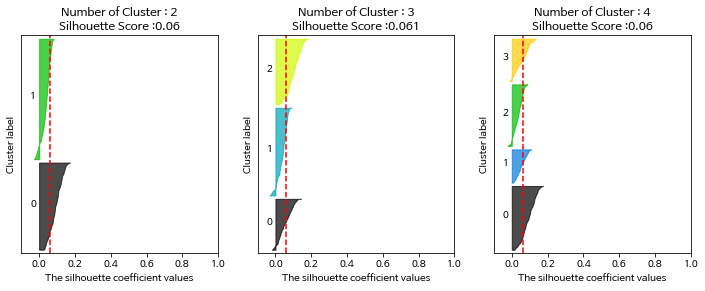

In [ ]:
visualize_silhouette([2,3,4], tf_V.toarray())

#### BOW 군집 별 핵심 단어 추출


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


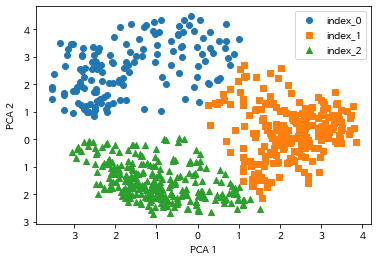

In [ ]:
time_index = pd.date_range("2022-10-31", "2021-01-01", freq='-1D')
num_cluster = 3

vec = CountVectorizer()
V = vec.fit_transform(docs)

df_docs = pd.DataFrame(V.toarray(), columns=vec.get_feature_names(), index=time_index)
kmeans = KMeans(n_clusters=num_cluster).fit(df_docs)

df_docs["cluster"] = kmeans.labels_

# PCA 기법을 통해 2차원으로 축소 후, 군집 결과를 시각화.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_docs)

df_docs["pca_x"] = pca_transformed[:,0]
df_docs["pca_y"] = pca_transformed[:,1]


# 시각화
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in range(num_cluster):
    label_cluster = df_docs[df_docs['cluster'] == label].index
    plt.scatter(x=df_docs.loc[label_cluster, 'pca_x'], y=df_docs.loc[label_cluster, 'pca_y'], marker=markers[label], label=f'index_{label}')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

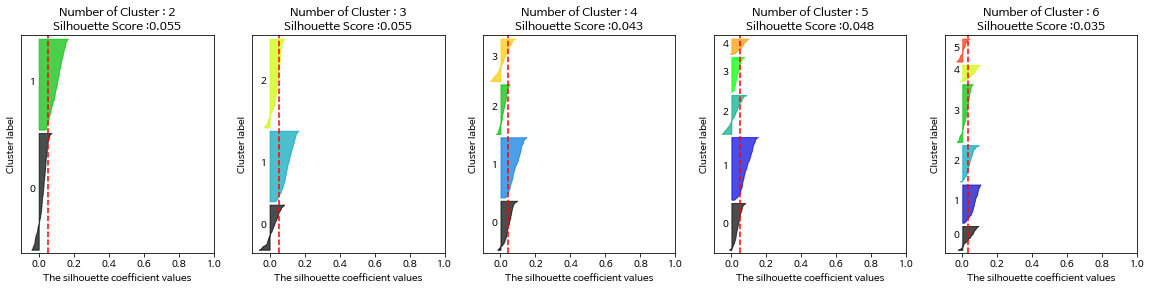

In [ ]:
visualize_silhouette([2,3,4,5,6], V.toarray())

In [ ]:
# https://github.com/wikibook/pymlrev2/blob/main/8%EC%9E%A5/8.7%20%EB%AC%B8%EC%84%9C%20%EA%B5%B0%EC%A7%91%ED%99%94%20%EC%86%8C%EA%B0%9C%EC%99%80%20%EC%8B%A4%EC%8A%B5(Opinion%20Review%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%84%B8%ED%8A%B8).ipynb

cluster_centers = kmeans.cluster_centers_

# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('==='*30)


vec = CountVectorizer()
V = vec.fit_transform(docs)
feature_names = vec.get_feature_names()

cluster_details = get_cluster_details(cluster_model=kmeans, cluster_data=V.toarray(),\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['미국', '사람', '한국', '새끼', '생각', '주식', '이유', '미주', '요즘', '테슬라']
####### Cluster 1
Top features: ['간다', '하락', '생각', '시발', '사람', '병신', '미주', '미국', '매수', '오늘']
####### Cluster 2
Top features: ['생각', '주식', '미국', '사람', '새끼', '테슬라', '매수', '나스닥', '시작', '시발']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### gensim 라이브러리를 이용한 word2vec

In [ ]:
import gensim
from gensim.models.word2vec import Word2Vec

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tokens = df_twoletters[0]

In [ ]:
model_komoran = Word2Vec(tokens, min_count=10)

In [ ]:
def get_document_vectors(tokens):
    document_embedding_list = []

    # 각 문서에 대해서
    for line in tqdm(tokens):
        doc2vec = None
        count = 0
        for word in line:
            if word in model.wv.key_to_index:
                count += 1
                # 해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = model.wv[word]
                else:
                    doc2vec = doc2vec + model.wv[word]

        if doc2vec is not None:
            # 단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    # 각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list

In [ ]:
model_komoran.save('model_komoran.model')

In [ ]:
model_komoran = Word2Vec.load("model_komoran.model")

In [ ]:
document_embedding_list = get_document_vectors(tokens)
len(document_embedding_list)

100%|██████████| 669/669 [00:21<00:00, 30.72it/s]


669

In [ ]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)

코사인 유사도 매트릭스의 크기 : (669, 669)


In [ ]:
df_sim = pd.DataFrame(cosine_similarities, index=tokens.index, columns=tokens.index )
df_sim.head()

,2022-10-31,2022-10-30,2022-10-29,2022-10-28,2022-10-27,2022-10-26,2022-10-25,2022-10-24,2022-10-23,2022-10-22,...,2021-01-10,2021-01-09,2021-01-08,2021-01-07,2021-01-06,2021-01-05,2021-01-04,2021-01-03,2021-01-02,2021-01-01
2022-10-31,1.000000,0.861763,0.976960,0.906717,0.927781,0.966210,0.988265,0.981294,0.871983,0.953424,...,0.888722,0.888169,0.905246,0.923679,0.940350,0.938668,0.928267,0.894783,0.842312,0.874328
2022-10-30,0.861763,1.000000,0.868516,0.713787,0.736419,0.774409,0.831747,0.845152,0.955288,0.938557,...,0.907093,0.817019,0.803588,0.855411,0.838441,0.840347,0.829649,0.886398,0.882805,0.868288
2022-10-29,0.976960,0.868516,1.000000,0.923723,0.929259,0.968530,0.980508,0.961748,0.889733,0.966348,...,0.927353,0.922592,0.933719,0.936274,0.948393,0.943453,0.941031,0.932810,0.896122,0.916014
2022-10-28,0.906717,0.713787,0.923723,1.000000,0.988546,0.969010,0.902192,0.884822,0.723532,0.820313,...,0.836142,0.893861,0.928199,0.910059,0.935902,0.912062,0.911696,0.830359,0.818968,0.856159
2022-10-27,0.927781,0.736419,0.929259,0.988546,1.000000,0.980502,0.923483,0.908111,0.740223,0.838354,...,0.846621,0.905840,0.933542,0.923735,0.947316,0.926391,0.926924,0.841758,0.825080,0.865834


In [ ]:
def recommendations(input_date, k):
    print(df[df.index == input_date])
    date = datetime.datetime.strptime(input_date, "%Y-%m-%d")
    results = df_sim[date].sort_values(ascending=False)[1:k+1].index

    temp = pd.DataFrame()
    for result in results:
        temp = pd.concat([temp, df[df.index == result]])
    return temp

recommendations("2022-10-27", 5)

                                                        title         Close  \
2022-10-27  잠깐 잠깐만요  잠깐 나 애플 팔고싶은데 살려주면 안되냐 수면매매 드가자~ 쿠팡 미...  10792.669922   

              next_close  change  
2022-10-27  10970.990234   -1.65  


,title,Close,next_close,change
2022-02-04,아마존 타겟프라이스 4000$ㅋㅋ 프장에 스큐 허버허버주워담고 유튜브잠깐보고왓는데 ...,14098.009766,13878.820313,1.55
2022-10-28,애플 갈만큼 갔는데 AMZN이랑 SQQQ는 뭐하는 회사인가요? 나스닥 호재 뭐야??...,11102.450195,10792.669922,2.79
2022-04-28,테슬라 왜 이럼ㅠㅠ? 형들 250불로 단타치는거 팁 좀 주라 그래도 음전은 절대 ...,12871.530273,12488.929688,2.97
2022-02-08,알리바바 >>>>> 메타 갑자기 좆노잼장이라 존나 어색하네 10년물 채권금리 뭐냐...,14194.450195,14015.669922,1.26
2022-04-29,바이든이 빨리 용납 못한다고 했으면 좋겠다 하루오르고 이틀 개처박고 반복 나스닥 9...,12334.639648,12871.530273,-4.35


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
vocab = model_komoran.wv.key_to_index

In [ ]:
X = model_komoran.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:1000])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
vv =sorted(vocab, key=vocab.get)
df = pd.DataFrame(X_tsne, index=vv[:1000], columns=['x','y'])
df

,x,y
오늘,1.231518,-17.215452
숏,-4.451570,-8.727034
주식,0.652495,1.026291
나스닥,3.526572,-12.640630
테슬라,-3.602434,19.885509
...,...,...
블룸버그,17.353867,11.678392
조사,15.784431,25.320711
자금,-6.037002,1.176301
기도,7.620242,-4.771674


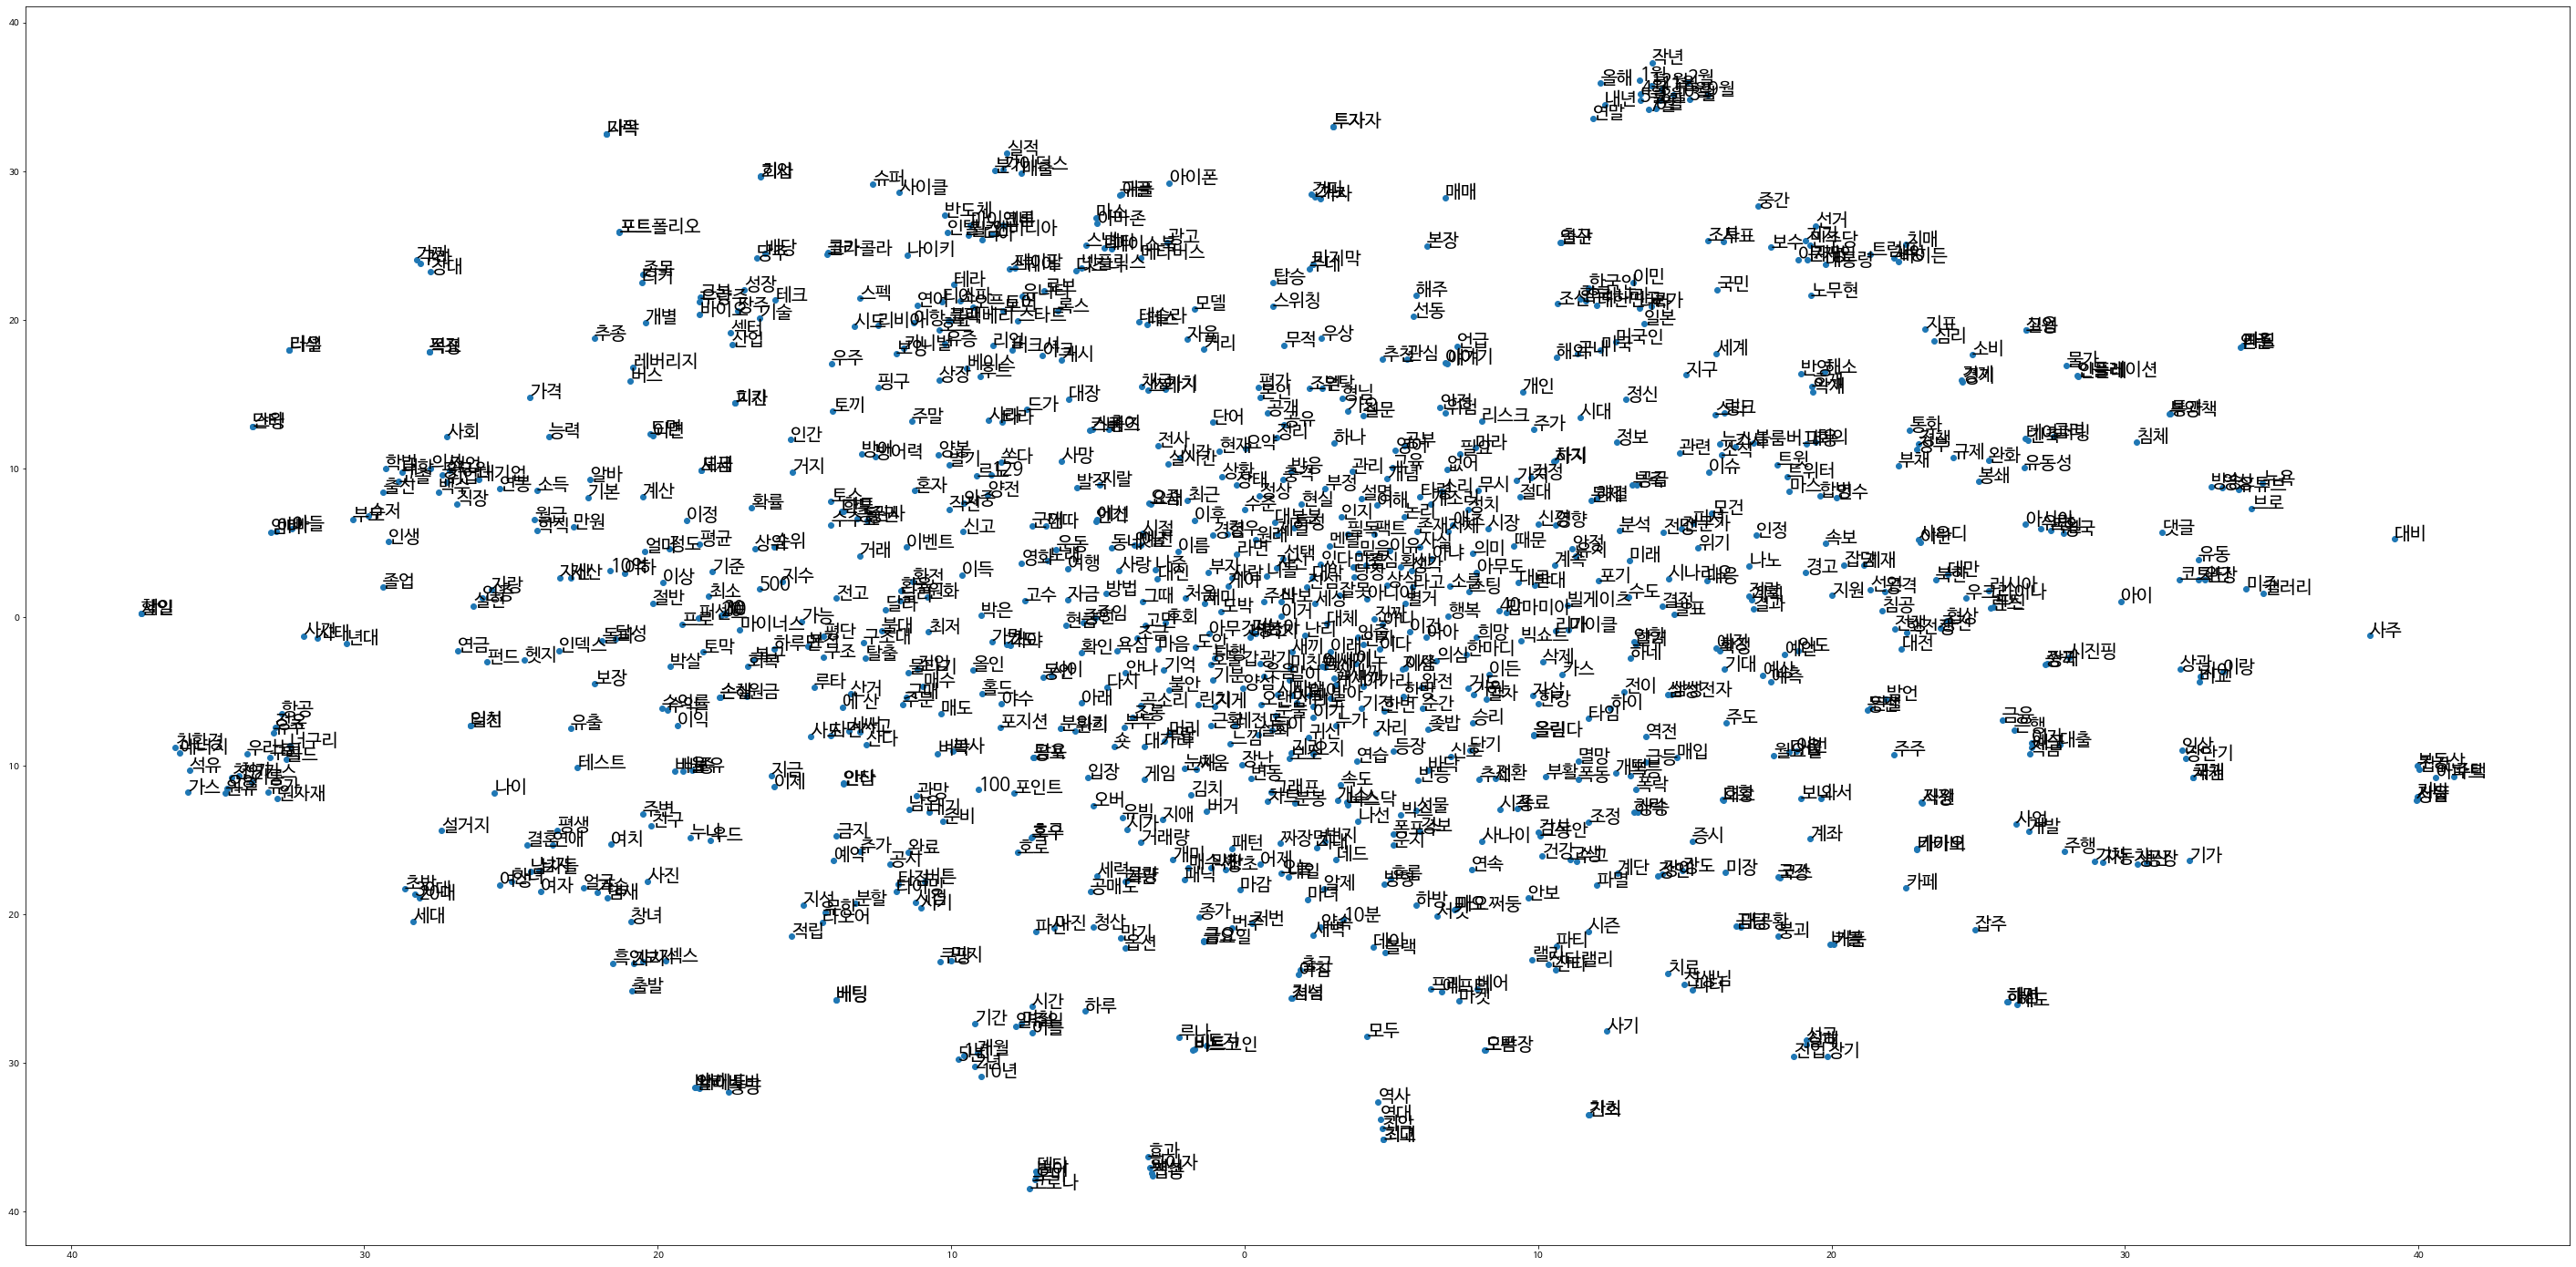

In [ ]:
fig = plt.figure()
fig.set_size_inches(50, 25)
ax = fig.add_subplot(1,1,1)
ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=20)
plt.show()